In [1]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
#  Klausimai:
#  Ar buvo mėnesių, kurie išssikirtų gaisringumu?
#  Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 

#  kokios vyraujančios 5 GMP kvietimo priežastys? Pateikite procentinį įvertinimą.
#  ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?
#  
#  pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
#  Pateikite procentinį įvertinimą.

#  Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
gmp = pd.read_csv('../../GMP.csv')

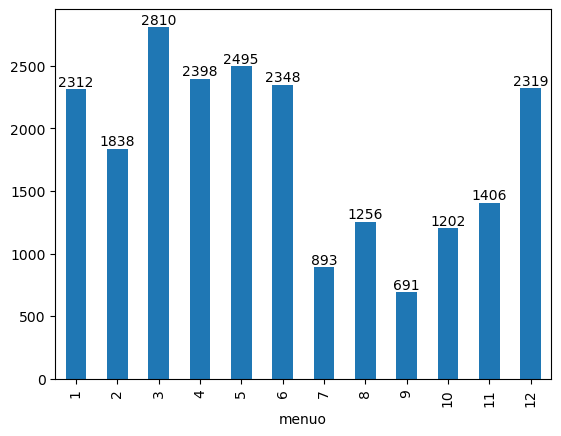

In [9]:
f = gmp['zemesnis_ivykio_tipas'].str.contains('Gaisras', na=False)
ax = gmp[f]['menuo'].value_counts().sort_index().plot(kind='bar')
for p in ax.containers:
    ax.bar_label(p)

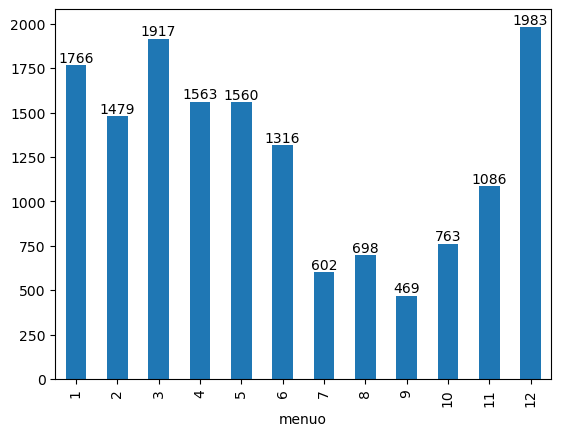

In [12]:
gaisrai = gmp[f]
ax = gaisrai[~gaisrai['zemesnis_ivykio_tipas'].str.contains('Gaisras 0')]['menuo'].value_counts().sort_index().plot(kind='bar')
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
k = pd.read_csv('../../DaugKaunas.csv')
k.head()

,X,Y,vda_id,seniunija,gatve,namo_nr,butu_sk,negyvenamu_sk,aukstu_sk,namo_plotas,zemes_plotas,statybos_metai,valdymo_forma,valdytojas,admin_pabaiga,ar_perduotas,bukle,atlikti_darbai,object_id,geom
0,NaN,NaN,4fc5a7d3836798b,NaN,Vilniaus g.,24A,NaN,0,NaN,0.00,0.0,NaN,Bendrija,NaN,NaN,1,NaN,NaN,1,NaN
1,496691.0,6081114.0,0890dd305e40157,Šančių,A. Juozapavičiaus pr.,20,22.0,0,4.0,1323.68,0.0,1958/01/01 00:00:00+00,Jungtinės veiklos sutartis,JVS A. Juozapavičiaus 20,2015/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, tinkuojamas fasadas,...",2,NaN
2,496194.0,6081568.0,98974b9870e990b,Šančių,A. Juozapavičiaus pr.,46,23.0,1,3.0,869.67,0.0,1950/01/01 00:00:00+00,Administratorius,"Civinity namai Kaunas, UAB",2016/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, ventiliuojamas fasada...",3,NaN
3,492920.0,6085540.0,80cb2d1f7a6c1fa,Vilijampolės,A. Kriščiukaičio g.,6,48.0,0,12.0,3422.00,0.0,1960/01/01 00:00:00+00,Bendrija,"DNSB ""K6""",2017/01/01 00:00:00+00,1,Renovuotas,"Cokolis šiltinamas, Fasadas šiltinamas, Stogo ...",4,NaN
4,497636.0,6081522.0,f92748df3ba9189,Panemunės,A. Smetonos al.,43,9.0,0,3.0,462.99,0.0,1960/01/01 00:00:00+00,Bendrija,"DNSB ""Bičiulių alėja""",2015/01/01 00:00:00+00,1,Renovuotas,"Cokolis šiltinamas, Fasadas šiltinamas, Stogo ...",5,NaN


In [ ]:
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/27c22303570541fd9dae7299be45d601_0/about
# Ar yra skirtumas tarp to, kas administruoja
# pastatą, ir noro renovuotis? (Suraskite, kiek procentų yra renovavęsi
# pagal administravimo pobūdį)
# Ar galima teigti, kad kuo senesnis pastatas, tuo gyventojai
# nori labiau renovacijos? 
# (pastatų amžius vs renovuotų tokio amžiaus pastatų  kiekis)
# kurioje seniūnijoje daugiausiasi renovuotų pastatų?
# kokios trys seniūnijos yra renovacijos priekyje?

In [13]:
e = pd.read_json('../../../Desktop/FAILAI/ei_2022_12_31.json')

In [14]:
#Suraskite 2013-2023 metų eismo įvykuose daugiausiai 
# kartų užfiksuotą automobilių a) gamintoją b) modelį. 
# Kiekvienais metais tas gamintojas/modelis 
# gali būti skirtingas - pateikite bar/barh grafikus.
#  kiek iš užfiksuotų automobilių turėjo
#  kasko draudimą?

In [17]:
e['eismoTranspPreimone'][0][0]

{'tpId': 32912177,
 'regValstybe': 'Lietuva',
 'kategorija': 'Keleivinis automobilis',
 'klase': None,
 'marke': 'MERCEDES-BENZ',
 'modelis': 'C 200 CDI',
 'pagaminimoMetai': None,
 'pasisalino': None,
 'ypatumai': None,
 'apgadinimai': 'Priekinis bamperis',
 'apgadinimaiKita': None,
 'apdraustasCivilines': 1,
 'apdraustasKasko': 1,
 'fizinis': 'Taip',
 'dalyvautiVTUzdrausta': 'Ne',
 'nuliamiantysGedimai': [],
 'pirminiaiSmugiai': ['Priekinis']}